# 01 Data Exploration & Cleaning


In [ ]:
# ================================================================
# Bachelor Thesis — Fairness in Toxic Comment Classification
# ---------------------------------------------------------------
# Notebook: data_exploration_and_analysis.ipynb
# Author: Philipp Stocker
# Created: 19.10.2025
# Purpose: This notebook performs exploratory data analysis (EDA) on the Jigsaw Unintended Bias in Toxicity Classification dataset.
# It aims to understand data characteristics, inspect class distributions, identify representation imbalances for gender and LGBTQ-related identity terms,
# and detect potential sources of bias relevant to fairness analysis.
# ================================================================

# --- Basic setup ---
import os
import sys
import warnings
warnings.filterwarnings("ignore")  # keep output clean for reports

# Automatically add project root to path so src/ modules are importable
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

# --- Standard imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- "Global variables" ---
DATA_RAW = os.path.join(project_root, "data", "raw")
DATA_PROCESSED = os.path.join(project_root, "data", "processed")

IDENTITY_COLUMNS = ["male", "female", "heterosexual", "homosexual_gay_or_lesbian", "bisexual", "transgender", "other_gender", "other_sexual_orientation"]

print("✅ Environment ready")


✅ Environment ready


LOAD DATA

In [ ]:
# Load raw training data (from Kaggle Toxic Comment Classification Challenge dataset)
df = pd.read_csv(os.path.join(DATA_RAW, "train.csv"))
# Quick data overview
print(df.shape)
print(df.columns[:10])  # preview columns
df.head(10)


(1804874, 45)
Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist'],
      dtype='object')


,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.000000,4,47
5,59859,0.666667,ur a sh*tty comment.,0.047619,0.638095,0.000000,0.333333,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.009524,0,105
6,59861,0.457627,hahahahahahahahhha suck it.,0.050847,0.305085,0.000000,0.254237,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.220339,0,59
7,59863,0.000000,FFFFUUUUUUUUUUUUUUU,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
8,239575,0.000000,The ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,26662,approved,0,0,0,0,0,0.000000,0,4
9,239576,0.000000,It was a great show. Not a combo I'd of expect...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,26650,approved,0,0,0,1,0,0.000000,0,4


Loading the test_public_expanded dataset and printing some basic information (for explorational purposes):

In [ ]:
test_public = pd.read_csv("../data/raw/test_public_expanded.csv")
print(test_public.shape)
print(test_public.columns[:10])  # preview columns
test_public.head(10)

DATA TRYOUTS AND CHECKS

In [21]:
pd.Series(df.columns).to_frame('columns') # list all columns in the train dataset

,columns
0,id
1,target
2,comment_text
3,severe_toxicity
4,obscene
5,identity_attack
6,insult
7,threat
8,asian
9,atheist


In [ ]:
df.isnull().sum().sort_values(ascending=False) # check for missing values in complete dataset

muslim                                 1399744
hindu                                  1399744
white                                  1399744
transgender                            1399744
psychiatric_or_mental_illness          1399744
physical_disability                    1399744
other_sexual_orientation               1399744
other_religion                         1399744
other_race_or_ethnicity                1399744
other_gender                           1399744
other_disability                       1399744
male                                   1399744
latino                                 1399744
jewish                                 1399744
intellectual_or_learning_disability    1399744
homosexual_gay_or_lesbian              1399744
heterosexual                           1399744
black                                  1399744
atheist                                1399744
bisexual                               1399744
asian                                  1399744
buddhist     

In [ ]:
(df[IDENTITY_COLUMNS] > 0.5).sum().sort_values(ascending=False) # count of positive samples per identity column in complete dataset


female                       30189
male                         19005
homosexual_gay_or_lesbian     4997
transgender                   1047
heterosexual                   335
bisexual                        51
other_gender                     0
other_sexual_orientation         0
dtype: int64

In [ ]:
(test_public[IDENTITY_COLUMNS] > 0.5).mean().sort_values(ascending=False) # count of positive samples per identity column in public dataset

NameError: name 'test_public' is not defined

Tests for different thresholds for toxicity label:

In [ ]:
# test share of toxic comments at different thresholds
for t in [0.3, 0.5, 0.7]:
    share = (df["target"] >= t).mean()
    print(f"Threshold {t}: {share:.3f} toxic comments")

Threshold 0.3: 0.147 toxic comments
Threshold 0.5: 0.080 toxic comments
Threshold 0.7: 0.033 toxic comments


In [ ]:
# view some examples of comments with target between 0.15 and 0.25 (toxicity borderline cases)
df.loc[df["target"].between(0.15, 0.25), "comment_text"].sample(10, random_state=3).tolist()


['James, you really need to keep a better eye out to what is actually going on instead of listening to your fears and bigotry.\n\nhttp://www.seattletimes.com/seattle-news/politics/state-weighs-using-pot-revenue-to-plug-school-funding-gap/',
 'To the people of Anchorage. Every dollar that built Anchorage, Fairbanks and Juneau came from rural Alaska. Every dime. Every penny. You all did not contribute one red-cent.',
 'There were always and will always be some pedophile and pederasts priests within the group of hundreds of thousands.  There will also be some saints. Any adult who thinks otherwise is either daft or has lived in a cave alone for their either life.',
 '"Irresponsible" is proposing illegal and nonsensical ideas.  At this point the responsible thing to do is to make changes that are legal and then to do the right thing and make good on our financial obligations.  Ideas include changes to PERS that disallow so-called "spiking", increasing the FAS calculation to five years inst

In [ ]:
train_prepared = pd.read_csv(os.path.join(DATA_PROCESSED, "train.csv"))
test_prepared = pd.read_csv(os.path.join(DATA_PROCESSED, "test.csv"))
validation_prepared = pd.read_csv(os.path.join(DATA_PROCESSED, "validation.csv"))

# print share of toxic comments and comments with identity mentions in all datasets (to check for distributional shifts)
print("Toxic share:", df["label"].mean(), train_prepared["label"].mean(), test_prepared["label"].mean(), validation_prepared["label"].mean())
print("Identity share:", df["has_identity"].mean(), train_prepared["has_identity"].mean(), test_prepared["has_identity"].mean(), validation_prepared["has_identity"].mean())

EXPLORATORY DATA ANALYSIS (EDA)

Objectives: Understand data characteristics and identify potential sources of bias.

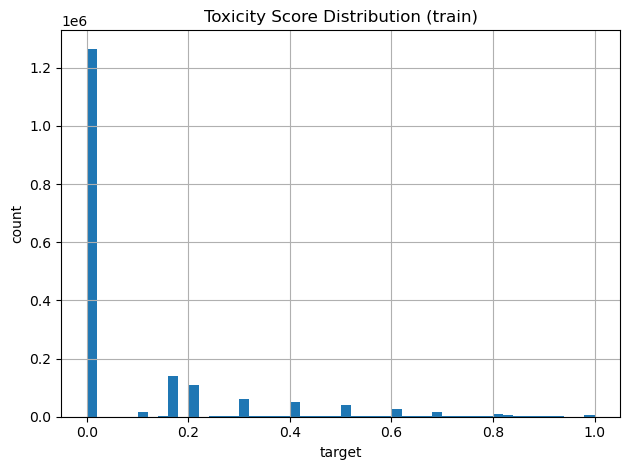

In [ ]:
plt.figure()
df['target'].hist(bins=50) # create histogram for toxicity distribution
plt.title('Toxicity Score Distribution (train)')
plt.xlabel('target')
plt.ylabel('count')
plt.tight_layout()

<Axes: title={'center': 'Toxic vs Non-Toxic Distribution'}, xlabel='is_toxic'>

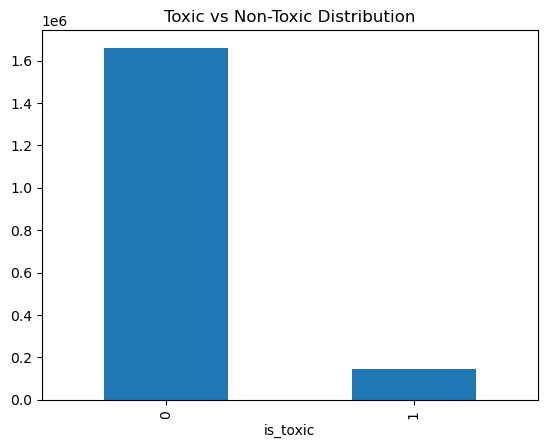

In [ ]:
# create binary toxicity label based on threshold of 0.5
df["is_toxic"] = (df["target"] >= 0.5).astype(int)
df["is_toxic"].value_counts(normalize=True)

df["is_toxic"].value_counts().plot(kind="bar", title="Toxic vs Non-Toxic Distribution")


In [ ]:
# view distribution of toxicity scores across different identity groups
group_toxicity = {
    col: df.loc[df[col] > 0.5, "target"].mean()
    for col in IDENTITY_COLUMNS
}
pd.Series(group_toxicity).sort_values(ascending=False)


other_sexual_orientation     0.443568
other_gender                 0.388889
homosexual_gay_or_lesbian    0.311389
transgender                  0.249507
bisexual                     0.247296
male                         0.181593
female                       0.172671
dtype: float64

<Axes: >

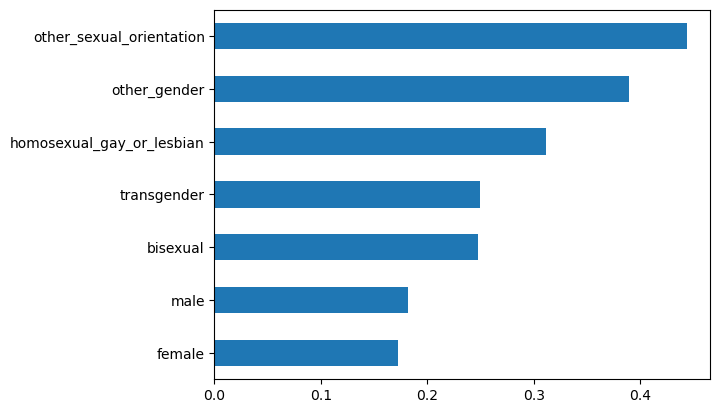

In [ ]:
pd.Series(group_toxicity).sort_values().plot(kind="barh") # horizontal bar plot of toxicity scores across different identity groups


In [ ]:
# compute correlation of identity columns with target toxicity score
corrs = df[IDENTITY_COLUMNS + ["target"]].corr()["target"].sort_values(ascending=False)
corrs.head(10)


target                       1.000000
homosexual_gay_or_lesbian    0.131110
male                         0.073822
female                       0.062904
transgender                  0.042517
other_sexual_orientation     0.032749
bisexual                     0.021057
other_gender                 0.012564
Name: target, dtype: float64

In [ ]:
# create summary table with coverage and mean toxicity per identity group
summary = pd.DataFrame({
    "coverage": (df[IDENTITY_COLUMNS] > 0.5).mean(),
    "mean_toxicity": [df.loc[df[col] > 0.5, "target"].mean() for col in IDENTITY_COLUMNS]
}).sort_values("coverage", ascending=False)
print(summary)


                           coverage  mean_toxicity
female                     0.028006       0.172671
male                       0.022182       0.181593
homosexual_gay_or_lesbian  0.005670       0.311389
transgender                0.001224       0.249507
bisexual                   0.000095       0.247296
other_gender               0.000002       0.388889
other_sexual_orientation   0.000002       0.443568
